# Preparing and Initializing Data

In [1]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize Google Trends data
google_trends_data = {
    "Sport": [
        "Swimming", "Athletics", "Baseball", "Softball", "Breaking",
        "Cricket", "Cycling-BMX Freestyle", "Cycling-Track", 
        "Equestrian-Jumping", "Flag Football", "Football", 
        "Gymnastics-Artistic", "Karate", "Lacrosse-Sixes", 
        "Rowing-Coastal", "Sailing", "Skateboarding", "Squash"
    ],
    "GoogleTrends_AvgInterest": [
        15.482, 39.286, 44.669, 46.210, 29.423, 16.471, 
        28.719, 7.823, 31.431, 21.067, 24.071, 8.046, 
        55.812, 31.998, 26.404, 45.975, 34.395, 44.466
    ]
}

# Initialize attendance data
attendance_data = {
    "Sport": [
        "Swimming", "Athletics", "Baseball", "Softball", "Breaking",
        "Cricket", "Cycling-BMX Freestyle", "Cycling-Track", 
        "Equestrian-Jumping", "Flag Football", "Football", 
        "Gymnastics-Artistic", "Karate", "Lacrosse-Sixes", 
        "Rowing-Coastal", "Sailing", "Skateboarding", "Squash"
    ],
    "Average_Attendance": [
        15000, 50000, 25000, 15000, 10000, 30000, 5000, 6000,
        8000, 5000, 60000, 18000, 12000, 8000, 6000, 4000, 7000, 5000
    ]
}

# Initialize venue cost data
cost_data = {
    "Sport": [
        "Swimming", "Athletics", "Baseball", "Softball", "Breaking",
        "Cricket", "Cycling-BMX Freestyle", "Cycling-Track", 
        "Equestrian-Jumping", "Flag Football", "Football", 
        "Gymnastics-Artistic", "Karate", "Lacrosse-Sixes", 
        "Rowing-Coastal", "Sailing", "Skateboarding", "Squash"
    ],
    "Venue_Cost": [
        150, 390, 88, 88, 16, 50, 80, 80, 150, 80, 1500, 150,
        80, 30, 40, 25, 16, 5  # Unit: million USD
    ]
}

# Create DataFrames
df_trends = pd.DataFrame(google_trends_data)
df_attendance = pd.DataFrame(attendance_data)
df_cost = pd.DataFrame(cost_data)

# Merging Datasets

In [2]:
# Merge data
df = pd.merge(df_trends, df_attendance, on="Sport")  # Merge Google Trends and attendance data
df = pd.merge(df, df_cost, on="Sport")  # Merge the result with venue cost data

# Display the merged result
df.head()  # Show the first 5 rows of the merged DataFrame


,Sport,GoogleTrends_AvgInterest,Average_Attendance,Venue_Cost
0,Swimming,15.482,15000,150
1,Athletics,39.286,50000,390
2,Baseball,44.669,25000,88
3,Softball,46.210,15000,88
4,Breaking,29.423,10000,16


# Applying Min-Max normalization

In [3]:
# Apply Min-Max normalization
scaler = MinMaxScaler()
df["GoogleTrends_Norm"] = scaler.fit_transform(df[["GoogleTrends_AvgInterest"]])  # Normalize Google Trends data
df["Attendance_Norm"] = scaler.fit_transform(df[["Average_Attendance"]])  # Normalize attendance data
df["Cost_Norm"] = scaler.fit_transform(df[["Venue_Cost"]])  # Normalize venue cost data

# Calculate Accessibility = 1 - Cost_Norm
df["Accessibility"] = 1 - df["Cost_Norm"]

# View the normalized data
df[["Sport", "GoogleTrends_Norm", "Attendance_Norm", "Accessibility"]].head()  # Display the first 5 rows of relevant columns

,Sport,GoogleTrends_Norm,Attendance_Norm,Accessibility
0,Swimming,0.159599,0.196429,0.903010
1,Athletics,0.655629,0.821429,0.742475
2,Baseball,0.767801,0.375000,0.944482
3,Softball,0.799912,0.196429,0.944482
4,Breaking,0.450103,0.107143,0.992642


# Sort by Composite Score

In [4]:
# Set weights (adjustable)
w1 = 0.4  # Weight for Google Trends
w2 = 0.4  # Weight for attendance
w3 = 0.2  # Weight for accessibility

# Calculate composite score
df["Popularity_Accessibility_Score"] = (
    w1 * df["GoogleTrends_Norm"] +
    w2 * df["Attendance_Norm"] +
    w3 * df["Accessibility"]
)

# View composite score results
df[["Sport", "Popularity_Accessibility_Score"]].head()  # Display the first 5 rows of scores

,Sport,Popularity_Accessibility_Score
0,Swimming,0.323013
1,Athletics,0.739318
2,Baseball,0.646017
3,Softball,0.587433
4,Breaking,0.421427


# Ranks Sports

In [5]:
# Sort by composite score
df_sorted = df.sort_values(by="Popularity_Accessibility_Score", ascending=False)  # Sort in descending order of score

# Display ranking results
df_sorted[["Sport", "Popularity_Accessibility_Score"]]  # Show the sorted sports and their scores

,Sport,Popularity_Accessibility_Score
1,Athletics,0.739318
12,Karate,0.647109
2,Baseball,0.646017
3,Softball,0.587433
10,Football,0.535431
15,Sailing,0.515331
17,Squash,0.512571
5,Cricket,0.451777
16,Skateboarding,0.441441
13,Lacrosse-Sixes,0.426731


# Visualizes the Composite Scores

C:\Users\Ying\AppData\Local\Temp\ipykernel_13196\3075816207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


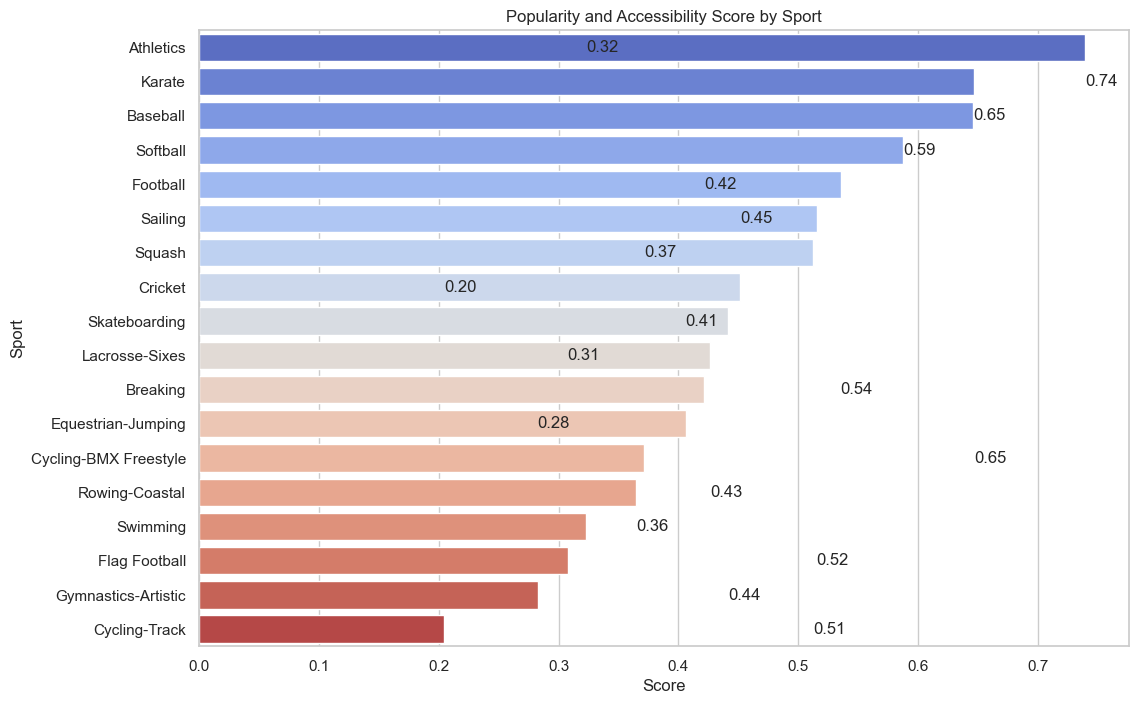

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Bar plot to visualize composite scores
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Popularity_Accessibility_Score",
    y="Sport",
    data=df_sorted,
    palette="coolwarm"
)
plt.title("Popularity and Accessibility Score by Sport")  # Set plot title
plt.xlabel("Score")  # Set x-axis label
plt.ylabel("Sport")  # Set y-axis label

# Add value annotations
for index, row in df_sorted.iterrows():
    plt.text(
        row["Popularity_Accessibility_Score"],  # x-coordinate
        index,  # y-coordinate
        f"{row['Popularity_Accessibility_Score']:.2f}",  # Score formatted to 2 decimal places
        va='center'  # Align vertically
    )

plt.show()  # Display the plot